LOad and Inspect Dataset


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/producer-prices_npl.csv')

df.head()

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,NaN,#indicator+name,NaN,NaN,NaN,#date+year,NaN,NaN,#indicator+type,#indicator+value+num,NaN
1,NPL,1991-01-01,1991-12-31,149.0,'524,Nepal,221,'01371,"Almonds, in shell",5530.0,Producer Price (LCU/tonne),1991.0,1991,7021.0,Annual value,LCU,80291.600000,I
2,NPL,1992-01-01,1992-12-31,149.0,'524,Nepal,221,'01371,"Almonds, in shell",5530.0,Producer Price (LCU/tonne),1992.0,1992,7021.0,Annual value,LCU,67149.300000,I
3,NPL,1993-01-01,1993-12-31,149.0,'524,Nepal,221,'01371,"Almonds, in shell",5530.0,Producer Price (LCU/tonne),1993.0,1993,7021.0,Annual value,LCU,67990.600000,I
4,NPL,1994-01-01,1994-12-31,149.0,'524,Nepal,221,'01371,"Almonds, in shell",5530.0,Producer Price (LCU/tonne),1994.0,1994,7021.0,Annual value,LCU,71168.600000,I


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9421 entries, 0 to 9420
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iso3             9421 non-null   object 
 1   StartDate        9421 non-null   object 
 2   EndDate          9421 non-null   object 
 3   Area Code        9420 non-null   float64
 4   Area Code (M49)  9420 non-null   object 
 5   Area             9421 non-null   object 
 6   Item Code        9421 non-null   object 
 7   Item Code (CPC)  9420 non-null   object 
 8   Item             9421 non-null   object 
 9   Element Code     9420 non-null   float64
 10  Element          9420 non-null   object 
 11  Year Code        9420 non-null   float64
 12  Year             9421 non-null   object 
 13  Months Code      9420 non-null   float64
 14  Months           9420 non-null   object 
 15  Unit             6347 non-null   object 
 16  Value            9421 non-null   object 
 17  Flag          

In [3]:
df.describe()

,Area Code,Element Code,Year Code,Months Code
count,9420.0,9420.000000,9420.000000,9420.0
mean,149.0,5533.610616,2008.362527,7021.0
std,0.0,3.809841,9.579540,0.0
min,149.0,5530.000000,1991.000000,7021.0
25%,149.0,5531.000000,2000.000000,7021.0
50%,149.0,5532.000000,2009.000000,7021.0
75%,149.0,5539.000000,2017.000000,7021.0
max,149.0,5539.000000,2024.000000,7021.0


In [4]:
df['Item'].unique()[:20]  # See available crops

array(['#indicator+name', 'Almonds, in shell', 'Apples', 'Apricots',
       'Areca nuts', 'Bananas', 'Barley', 'Beans, dry', 'Buckwheat',
       'Cabbages', 'Cauliflowers and broccoli', 'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Coconuts, in shell', 'Coffee, green', 'Cotton lint, ginned',
       'Cotton seed',
       'Edible roots and tubers with high starch or inulin content, n.e.c., fresh',
       'Eggs from other birds in shell, fresh, n.e.c.'], dtype=object)

Cleaning the Data

In [5]:
# Drop the metadata header row
df = df[df['Iso3'] != '#country+code']

In [6]:
# Convert numeric columns to appropriate types
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [7]:
# Keep only relevant columns
df = df[['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']]

In [8]:
# Drop missing values
df = df.dropna(subset=['Value'])

# Sort
df = df.sort_values(['Item', 'Year']).reset_index(drop=True)

In [9]:
df.head()

,Area,Item,Element,Year,Unit,Value
0,Nepal,Agriculture,Producer Price Index (2014-2016 = 100),1991,NaN,20.63
1,Nepal,Agriculture,Producer Price Index (2014-2016 = 100),1992,NaN,20.87
2,Nepal,Agriculture,Producer Price Index (2014-2016 = 100),1993,NaN,23.37
3,Nepal,Agriculture,Producer Price Index (2014-2016 = 100),1994,NaN,25.13
4,Nepal,Agriculture,Producer Price Index (2014-2016 = 100),1995,NaN,25.98


# (EDA) Quick data understanding

In [10]:
df.describe()

,Year,Value
count,9420.000000,9420.000000
mean,2008.362527,36845.209384
std,9.579540,83950.436332
min,1991.000000,4.430000
25%,2000.000000,101.842500
50%,2009.000000,1160.050000
75%,2017.000000,34724.200000
max,2024.000000,873591.800000


In [11]:
df['Item'].nunique(), df['Item'].value_counts().head(10)


(96,
 Item
 Almonds, in shell                                               134
 Apples                                                          134
 Apricots                                                        134
 Areca nuts                                                      134
 Barley                                                          134
 Bananas                                                         134
 Chick peas, dry                                                 134
 Chillies and peppers, green (Capsicum spp. and Pimenta spp.)    134
 Jute, raw or retted                                             134
 Hen eggs in shell, fresh                                        134
 Name: count, dtype: int64)

Duplicates or missing values

In [12]:
df.isna().sum()
df.duplicated().sum()


np.int64(0)

Average Prcie by year to give an idea of overall inflation/trend in agriculture

<Axes: title={'center': 'Average Crop Prices Over Time'}, xlabel='Year'>

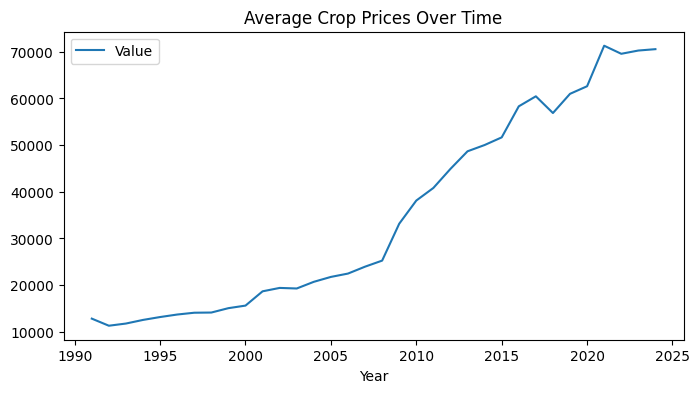

In [14]:
avg_by_year = df.groupby('Year')['Value'].mean().reset_index()
avg_by_year.plot(x='Year', y='Value', kind='line', title='Average Crop Prices Over Time', figsize=(8,4))
